In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# Define class names
class_names = [
    "Neoplastic",       # Channel 0
    "Inflammatory",     # Channel 1
    "Connective",       # Channel 2
    "Dead Cells",       # Channel 3
    "Epithelial",       # Channel 4
    "Background"        # Channel 5
]

In [3]:
# Load Data for all Folds
folds_data = {}
all_images_types = []
all_masks = []

In [4]:
for fold_num in range(1, 4):
    print(f"\nLoading data for Fold {fold_num} ...")
    images_path = f'../../PanNuke_Dataset/fold_{fold_num}/Fold {fold_num}/images/fold{fold_num}/images.npy'
    masks_path = f'../../PanNuke_Dataset/fold_{fold_num}/Fold {fold_num}/masks/fold{fold_num}/masks.npy'
    types_path = f'../../PanNuke_Dataset/fold_{fold_num}/Fold {fold_num}/images/fold{fold_num}/types.npy'
    images = np.load(images_path)
    masks = np.load(masks_path)
    types = np.load(types_path)

    folds_data[f'fold_{fold_num}'] = {
        'images': images,
        'masks': masks,
        'types': types
    }

    all_images_types.extend(types)
    all_masks.append(masks)
    print(f"Fold {fold_num} data loading completed.")


Loading data for Fold 1 ...
Fold 1 data loading completed.

Loading data for Fold 2 ...
Fold 2 data loading completed.

Loading data for Fold 3 ...
Fold 3 data loading completed.


#### Fold Level Statistics

In [5]:
all_images_types = np.array(all_images_types)
all_images_types

array(['Breast', 'Breast', 'Breast', ..., 'Colon', 'Colon', 'Colon'],
      dtype='<U13')

In [6]:
# Display the unique tissue types
unique_types = set(all_images_types)
print(f"\nUnique tissue types present across all folds:\n {unique_types}")


Unique tissue types present across all folds:
 {'Bile-duct', 'Adrenal_gland', 'Bladder', 'Esophagus', 'Uterus', 'Testis', 'Kidney', 'Pancreatic', 'Prostate', 'Ovarian', 'Lung', 'Cervix', 'Liver', 'HeadNeck', 'Colon', 'Breast', 'Stomach', 'Thyroid', 'Skin'}


In [7]:
num_unique_types = len(unique_types)
print(f"\nTotal number of unique tissue types: {num_unique_types}")


Total number of unique tissue types: 19


In [8]:
fold_stats = {}
for fold_name, data in folds_data.items():
    print(f"\n--- {fold_name} Analysis ---")
    
    num_images = data['images'].shape[0]
    fold_types = data['types']
    fold_masks = data['masks']

    # Tissue type distribution 
    unique_tissue_types, counts_tissue_types = np.unique(fold_types, return_counts=True)
    tissue_type_distribution = dict(zip(unique_tissue_types, counts_tissue_types))
    print(f"Number of images: {num_images}")
    print(f"Tissue Type Distribution: {tissue_type_distribution}")

    fold_stats[fold_name] = {
        'num_images': num_images,
        'tissue_type_distribution': tissue_type_distribution
    }


--- fold_1 Analysis ---
Number of images: 2656
Tissue Type Distribution: {'Adrenal_gland': 134, 'Bile-duct': 159, 'Bladder': 21, 'Breast': 827, 'Cervix': 155, 'Colon': 478, 'Esophagus': 155, 'HeadNeck': 70, 'Kidney': 37, 'Liver': 65, 'Lung': 80, 'Ovarian': 54, 'Pancreatic': 78, 'Prostate': 77, 'Skin': 59, 'Stomach': 50, 'Testis': 60, 'Thyroid': 80, 'Uterus': 17}

--- fold_2 Analysis ---
Number of images: 2523
Tissue Type Distribution: {'Adrenal_gland': 148, 'Bile-duct': 103, 'Bladder': 61, 'Breast': 749, 'Cervix': 52, 'Colon': 468, 'Esophagus': 128, 'HeadNeck': 169, 'Kidney': 56, 'Liver': 66, 'Lung': 53, 'Ovarian': 40, 'Pancreatic': 89, 'Prostate': 37, 'Skin': 87, 'Stomach': 48, 'Testis': 79, 'Thyroid': 84, 'Uterus': 6}

--- fold_3 Analysis ---
Number of images: 2722
Tissue Type Distribution: {'Adrenal_gland': 155, 'Bile-duct': 158, 'Bladder': 64, 'Breast': 775, 'Cervix': 86, 'Colon': 494, 'Esophagus': 141, 'HeadNeck': 145, 'Kidney': 41, 'Liver': 93, 'Lung': 51, 'Ovarian': 52, 'Pancre

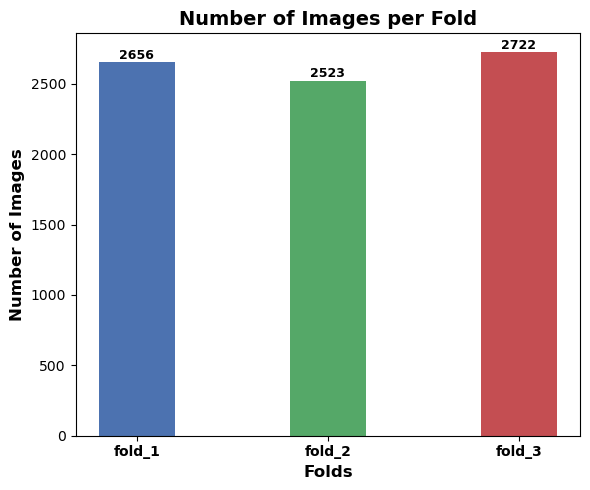

In [9]:
fold_names = list(fold_stats.keys())
num_images_per_fold = [stats['num_images'] for stats in fold_stats.values()]
bar_colors = ['#4C72B0', '#55A868', '#C44E52']

plt.figure(figsize=(6, 5))
bars = plt.bar(fold_names, num_images_per_fold,
               color=bar_colors[:len(fold_names)], linewidth=0.6, width=0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

plt.xlabel('Folds', fontsize=12, fontweight='bold')
plt.ylabel('Number of Images', fontsize=12, fontweight='bold')
plt.title('Number of Images per Fold', fontsize=14, fontweight='bold')
plt.xticks(ha='center', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()




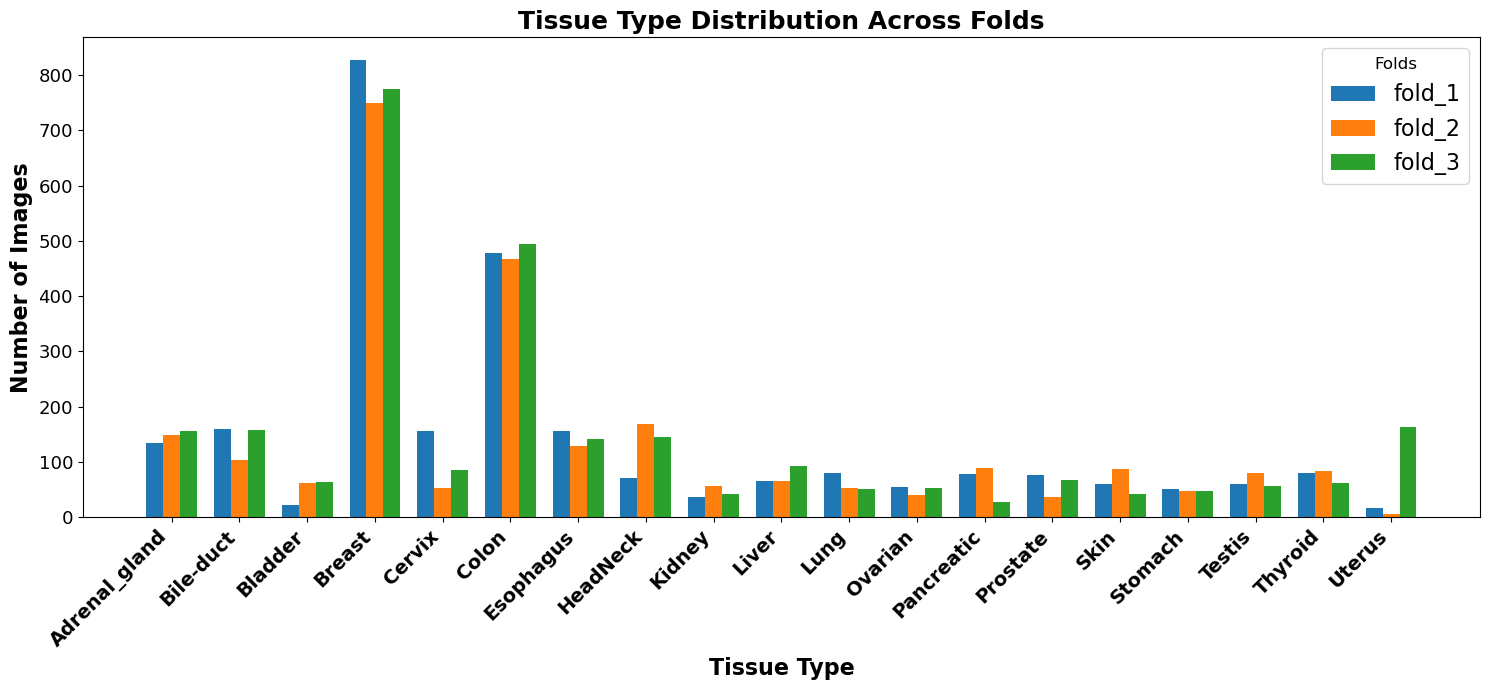

In [22]:
fold_names = list(fold_stats.keys())
tissue_types = sorted(list({tt for stats in fold_stats.values() for tt in stats['tissue_type_distribution'].keys()}))

data_matrix = np.array([
    [fold_stats[fold]['tissue_type_distribution'].get(tissue, 0) for fold in fold_names]
    for tissue in tissue_types
])

x = np.arange(len(tissue_types))
bar_width = 0.25
offsets = np.linspace(-bar_width, bar_width, len(fold_names))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.figure(figsize=(15, 7))

for i, (fold, offset) in enumerate(zip(fold_names, offsets)):
    plt.bar(x + offset, data_matrix[:, i],
            width=bar_width, label=fold,
            color=colors[i])

plt.xlabel('Tissue Type', fontsize=16, fontweight='bold')
plt.ylabel('Number of Images', fontsize=16, fontweight='bold')
plt.title('Tissue Type Distribution Across Folds', fontsize=18, fontweight='bold')
plt.xticks(x, tissue_types, rotation=45, ha='right', fontsize=14, fontweight='bold')
plt.yticks(fontsize=13)
plt.legend(title='Folds', fontsize=16, title_fontsize=12)
plt.tight_layout()
plt.show()


In [11]:
# Total images
total_images_dataset = sum(stats['num_images'] for stats in fold_stats.values())
print(f"Total Images: {total_images_dataset}")

Total Images: 7901


In [12]:
# Overall distribution of tissue types
overall_tissue_type_distribution = defaultdict(int)
for tissue_type in all_images_types:
    overall_tissue_type_distribution[tissue_type] += 1
print(f"Overall Tissue Type Distribution:\n{dict(overall_tissue_type_distribution)}")

Overall Tissue Type Distribution:
{'Breast': 2351, 'Colon': 1440, 'Lung': 184, 'Kidney': 134, 'Prostate': 182, 'Bladder': 146, 'Stomach': 146, 'Ovarian': 146, 'Esophagus': 424, 'Pancreatic': 195, 'Uterus': 186, 'Thyroid': 226, 'Skin': 187, 'Cervix': 293, 'Adrenal_gland': 437, 'Bile-duct': 420, 'Testis': 196, 'HeadNeck': 384, 'Liver': 224}


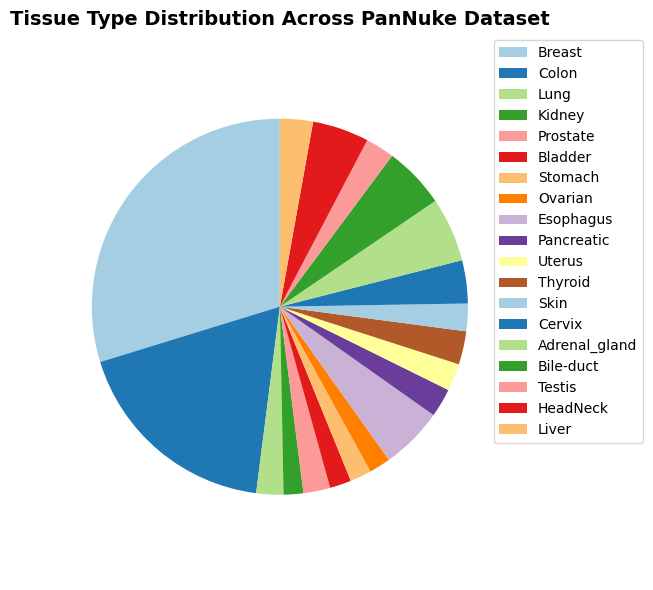

In [13]:
tissue_types_labels = list(overall_tissue_type_distribution.keys())
tissue_types_counts = list(overall_tissue_type_distribution.values())

plt.figure(figsize=(6, 6))
plt.pie(tissue_types_counts, startangle=90, colors=plt.cm.Paired.colors)
plt.title('Tissue Type Distribution Across PanNuke Dataset', fontsize=14, fontweight='bold')
# rotate the labels to avoid overlap
plt.legend(tissue_types_labels, loc='best', bbox_to_anchor=(1, 1), fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()


#### Nuclei

In [14]:
fold_stats_nuclei = {}
for fold_name, data in folds_data.items():  
    print(f"\n-------{fold_name}---------")

    # Nuclei counts per cell type 
    nuclei_counts_per_cell_type = defaultdict(int)
    total_nuclei_in_fold = 0

    for i in range(num_images):
        current_mask = fold_masks[i]
        for j in range(len(class_names) - 1):
            instance_channel = current_mask[:, :, j]
            count = len(np.unique(instance_channel[instance_channel > 0]))
            nuclei_counts_per_cell_type[class_names[j]] += count
            total_nuclei_in_fold += count

    print("Nuclei counts per cell type:")
    for cell_type, count in nuclei_counts_per_cell_type.items():
        print(f"  {cell_type}: {count} nuclei")
    print(f"Total detected nuclei in {fold_name}: {total_nuclei_in_fold}")

    fold_stats_nuclei[fold_name] = {
        'nuclei_counts_per_cell_type': nuclei_counts_per_cell_type,
        'total_nuclei': total_nuclei_in_fold
    }


-------fold_1---------
Nuclei counts per cell type:
  Neoplastic: 28471 nuclei
  Inflammatory: 10825 nuclei
  Connective: 17441 nuclei
  Dead Cells: 1057 nuclei
  Epithelial: 8860 nuclei
Total detected nuclei in fold_1: 66654

-------fold_2---------
Nuclei counts per cell type:
  Neoplastic: 28471 nuclei
  Inflammatory: 10825 nuclei
  Connective: 17441 nuclei
  Dead Cells: 1057 nuclei
  Epithelial: 8860 nuclei
Total detected nuclei in fold_2: 66654

-------fold_3---------
Nuclei counts per cell type:
  Neoplastic: 28471 nuclei
  Inflammatory: 10825 nuclei
  Connective: 17441 nuclei
  Dead Cells: 1057 nuclei
  Epithelial: 8860 nuclei
Total detected nuclei in fold_3: 66654


### Plot


In [15]:
for fold_name, stats in fold_stats_nuclei.items():
    print(fold_name, list(stats['nuclei_counts_per_cell_type'].keys()))
    


fold_1 ['Neoplastic', 'Inflammatory', 'Connective', 'Dead Cells', 'Epithelial']
fold_2 ['Neoplastic', 'Inflammatory', 'Connective', 'Dead Cells', 'Epithelial']
fold_3 ['Neoplastic', 'Inflammatory', 'Connective', 'Dead Cells', 'Epithelial']


In [16]:
type_colors = [
    [255, 0, 0],    # Red for Neoplastic
    [0, 255, 0],    # Green for Inflammatory
    [0, 0, 255],    # Blue for Connective
    [255, 255, 0],  # Yellow for Dead Cells
    [255, 165, 0]   # Orange for Epithelial
]
normalized_colors = [[r/255, g/255, b/255] for r, g, b in type_colors]

cell_type_color_map = {
    'Neoplastic': normalized_colors[0],
    'Inflammatory': normalized_colors[1],
    'Connective': normalized_colors[2],
    'Dead Cells': normalized_colors[3],
    'Epithelial': normalized_colors[4]
}

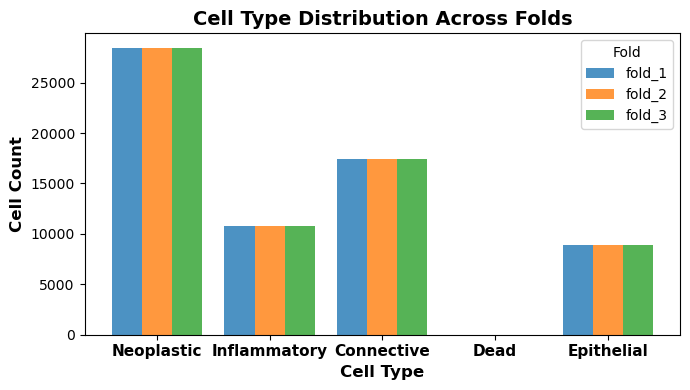

In [17]:
cell_types = ['Neoplastic', 'Inflammatory', 'Connective', 'Dead', 'Epithelial']
cell_type_color_map = dict(zip(cell_types, normalized_colors))
fold_names = list(fold_stats_nuclei.keys())
num_cell_types = len(cell_types)
num_folds = len(fold_names)

counts_matrix = np.array([
    [fold_stats_nuclei[fold]['nuclei_counts_per_cell_type'].get(cell_type, 0)
     for fold in fold_names]
    for cell_type in cell_types
])

x = np.arange(num_cell_types)
bar_width = 0.8 / num_folds  # total width per group divided among folds
offsets = np.linspace(-bar_width * (num_folds - 1) / 2, bar_width * (num_folds - 1) / 2, num_folds)

plt.figure(figsize=(7, 4))
for i, (fold, offset) in enumerate(zip(fold_names, offsets)):
    plt.bar(x + offset, counts_matrix[:, i],
            width=bar_width, label=fold, alpha=0.8)

# Axes labels and styling
plt.xticks(x, cell_types, fontsize=11, fontweight='bold')
plt.xlabel('Cell Type', fontsize=12, fontweight='bold')
plt.ylabel('Cell Count', fontsize=12, fontweight='bold')
plt.title('Cell Type Distribution Across Folds', fontsize=14, fontweight='bold')
plt.legend(title='Fold')
plt.tight_layout()
plt.show()

In [18]:
overall_nuclei_counts_per_cell_type = defaultdict(int)
total_nuclei_dataset = 0

for fold_name in folds_data:
    for cell_type, count in fold_stats_nuclei[fold_name]['nuclei_counts_per_cell_type'].items():
        overall_nuclei_counts_per_cell_type[cell_type] += count
    total_nuclei_dataset += fold_stats_nuclei[fold_name]['total_nuclei']
print("\nOverall Nuclei counts per cell type (across all folds):")

for cell_type, count in overall_nuclei_counts_per_cell_type.items():
    print(f"{cell_type}: {count} nuclei")


Overall Nuclei counts per cell type (across all folds):
Neoplastic: 85413 nuclei
Inflammatory: 32475 nuclei
Connective: 52323 nuclei
Dead Cells: 3171 nuclei
Epithelial: 26580 nuclei


In [19]:
print(f"Total nuclei in the entire dataset: {total_nuclei_dataset}")

Total nuclei in the entire dataset: 199962


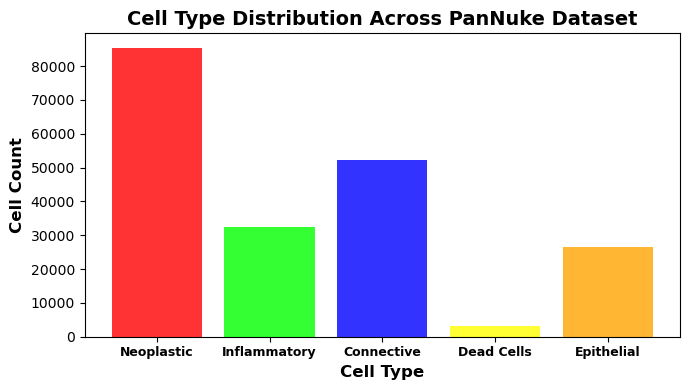

In [20]:
normalized_colors = [[r/255, g/255, b/255] for r, g, b in type_colors]
cell_types = list(overall_nuclei_counts_per_cell_type.keys())
nuclei_counts = list(overall_nuclei_counts_per_cell_type.values())

bar_colors = normalized_colors[:len(cell_types)]
plt.figure(figsize=(7, 4))
bars = plt.bar(cell_types, nuclei_counts, color=bar_colors, alpha=0.8)
plt.xlabel('Cell Type', fontsize=12, fontweight='bold')
plt.ylabel('Cell Count', fontsize=12, fontweight='bold')
plt.title('Cell Type Distribution Across PanNuke Dataset', fontsize=14, fontweight='bold')
plt.xticks(ha='center', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()
